In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, os.sep.join(["..", "packages"]))
# from multivare import tau_2_dim
from alphastable import *

In [2]:
Image_width = 10
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})

EXTRA_SMALL = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
sigma = 1
d = 2
N = 1000
alpha = 1.1
beta = 1
gamma = np.cos((np.pi * alpha) / 4) ** (2/alpha)
delta = 0
G = np.random.normal(0, sigma, size=[N, d])
A = alphastable(N, 1, alpha/2, beta, gamma, delta, 1)
X = np.sqrt(A) * G
MA = X.T

In [4]:
n = 30
E = np.arange(0, 2*np.pi, np.pi / n)
R = np.arange(0, 5, 1)
Gamma = np.ones((len(E), len(R)))
Gamma[:] = np.nan

for k in range(len(E)):
    e = E[k]
    for j in range(len(R)):
        r = R[j]
        counter_1 = 0
        counter_2 = 0
        for i in range(len(MA)):
            if np.arctan2(MA[1, i], MA[0, i]) < e and np.linalg.norm(MA[:, i]) > r:
                counter_1 += 1
            if np.linalg.norm(MA[:, i]) > r:
                counter_2 += 1
        if counter_2 != 0:
            Gamma[k, j] = counter_1 / counter_2

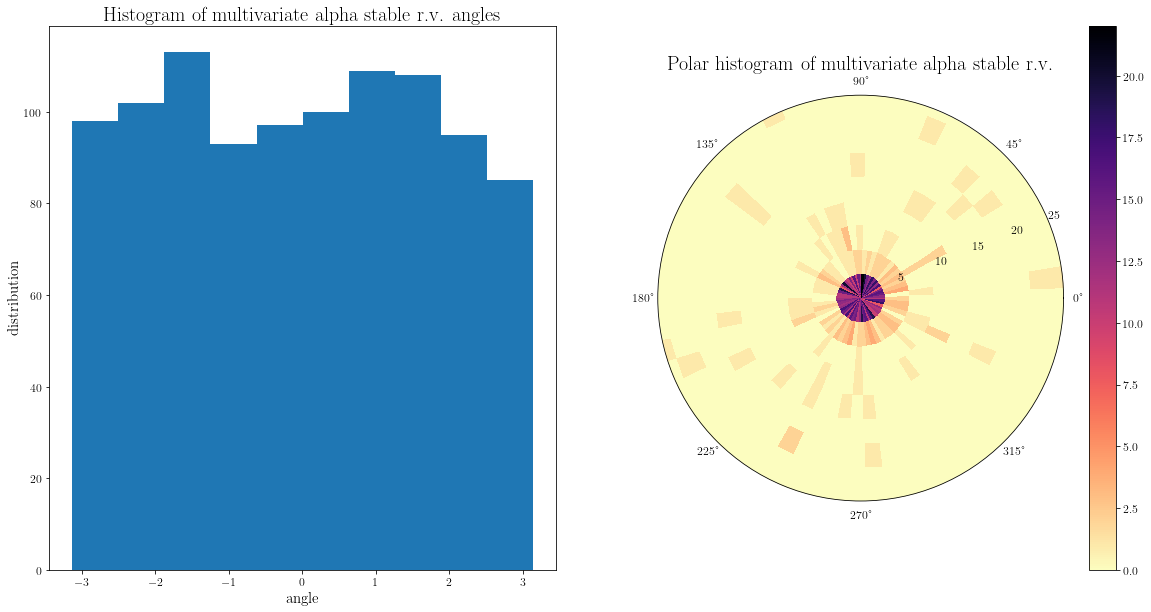

In [5]:
fig = plt.figure(figsize = (2 * Image_width, Image_width))
Points_angles = np.ones(np.size(MA, 1))
Points_radius = np.ones(np.size(MA, 1))
for i in range(np.size(MA, 1)):
    Points_angles[i] = np.arctan2(MA[1, i], MA[0, i]) # first one is  y coordinate and the second is x coordinate
    Points_radius[i] = np.linalg.norm(MA[:, i])
ax1 = fig.add_subplot(121)
ax1.hist(Points_angles)
ax1.set_title("Histogram of multivariate alpha stable r.v. angles")
ax1.set_xlabel("angle")
ax1.set_ylabel("distribution")

ax2 = fig.add_subplot(122, polar = True)
rbins = np.linspace(0, Points_radius.max(), 50)
abins = np.linspace(-np.pi, np.pi, 60)
hist, _, _ = np.histogram2d(Points_angles, Points_radius, bins = (abins, rbins))
Angles, Rad = np.meshgrid(abins, rbins)
ax2.grid(False)
pc = ax2.pcolormesh(Angles, Rad, hist.T, cmap = "magma_r")
ax2.set_ylim([0, 25])
ax2.set_title("Polar histogram of multivariate alpha stable r.v.")
fig.colorbar(pc);